In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv("datos.dat",sep = ",")
df["TIMESTAMP"] = pd.to_datetime(df.TIMESTAMP)

df = pd.DataFrame({"FECHA" : df["TIMESTAMP"],
                   "TEMP" : df["AirTC_Avg"]})

df["AÑO"] = df["FECHA"].dt.year
df["MES"] = df["FECHA"].dt.month
df["DIA"] = df["FECHA"].dt.day
df["HORA"] = df["FECHA"].dt.hour




In [18]:
hr_ant = 20
suma = 0
c = 0
temps = []
fecha = []
for i in range(0,len(df)):
    if(df["HORA"][i] == hr_ant):
        suma = suma + df["TEMP"][i]
        hr_ant = df["HORA"][i]
        c = c+1
    else:
        temps.append(suma/c)
        fecha.append(df["FECHA"][i])
        suma = df["TEMP"][i]
        hr_ant= df["HORA"][i]
        c = 1
temps.append(suma/c)
fecha.append(df["FECHA"][i])

###################
df2 = pd.DataFrame({"FECHA" : fecha,
                    "TEMP" : temps})
df2["FECHA"] = pd.to_datetime(df2.FECHA)
df2["AÑO"] = df2["FECHA"].dt.year
df2["MES"] = df2["FECHA"].dt.month
df2["DIA"] = df2["FECHA"].dt.day
df2.head()

,FECHA,TEMP,AÑO,MES,DIA
0,2018-05-11 21:00:00,22.810000,2018,5,11
1,2018-05-11 22:00:00,21.876667,2018,5,11
2,2018-05-11 23:00:00,18.386667,2018,5,11
3,2018-05-12 00:00:00,17.540000,2018,5,12
4,2018-05-12 01:00:00,16.561667,2018,5,12


In [24]:
suma=0
sumas = []
fecha = []
tmax = -1000
tmin = 1000
tmaxs = []
tmins = []


for i in range(df2["AÑO"][0],df2["AÑO"][len(df2)-1]+1):
    dfaño = df2[df2["AÑO"] == i]
    for j in range(dfaño["MES"][dfaño.index[0]],dfaño["MES"][dfaño.index[len(dfaño)-1]]+1):
        if(j < 11 and i == 2018):
            continue
        else:
            dfmes = dfaño[dfaño["MES"] == j]
        for k in range(dfmes["DIA"][dfmes.index[0]],dfmes["DIA"][dfmes.index[len(dfmes)-1]]+1):
            dfdia = dfmes[dfmes["DIA"] == k]
            for n in dfdia.index:
                if(dfdia["TEMP"][n] > tmax):
                    tmax = dfdia["TEMP"][n]
                if(dfdia["TEMP"][n] < tmin):
                    tmin = dfdia["TEMP"][n]
                if(dfdia["TEMP"][n] < 1.5):
                    continue
                elif(dfdia["TEMP"][n] >= 1.5  and dfdia["TEMP"][n] < 2.5):
                    suma = suma + 0.5
                elif(dfdia["TEMP"][n] >= 2.5  and dfdia["TEMP"][n] < 9.2):
                    suma = suma + 1.0
                elif(dfdia["TEMP"][n] >= 9.2  and dfdia["TEMP"][n] < 12.5):
                    suma = suma + 0.5
                elif(dfdia["TEMP"][n] >= 12.5 and dfdia["TEMP"][n] < 16):
                    continue
                elif(dfdia["TEMP"][n] >= 16   and dfdia["TEMP"][n] < 18):
                    suma = suma - 0.5
                else:
                    suma = suma - 1.0
            fecha.append(str(i) + " " + str(j) + " " + str(k))
            sumas.append(suma)
            suma = 0
            
            tmaxs.append(tmax)
            tmins.append(tmin)
            tmax = -1000
            tmin =  1000
            

            
            
            

In [25]:
UF24 = pd.DataFrame({"FECHA" : fecha,
                     "Unidad Frio" : sumas,
                     "TMAX" : tmaxs,
                     "TMIN" : tmins})
UF24["FECHA"] = pd.to_datetime(UF24.FECHA)


In [26]:
UF24.head()

,FECHA,Unidad Frio,TMAX,TMIN
0,2018-11-01,-0.5,28.621667,6.806833
1,2018-11-02,-8.5,30.960000,10.248333
2,2018-11-03,-9.0,29.998333,10.473333
3,2018-11-04,-11.5,31.243333,11.670000
4,2018-11-05,-8.5,31.093333,11.435000


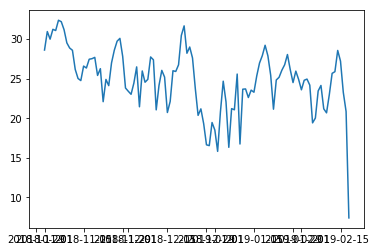

In [30]:

plt.plot(UF24["FECHA"],UF24["TMAX"])
plt.show()


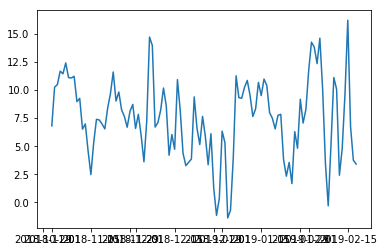

In [29]:
plt.plot(UF24["FECHA"],UF24["TMIN"])
plt.show()